# Decision Trees

In this lab you will learn the most important aspects of the decision tree learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import DecisionTreeClassifier.

## Problem Setting

First of all, we calculate by hand the impurity measure of splitting some data by some criteria $q$ which in our case is given by a threshold t. Remember, that information gain is calculated as follows: 
$$IG(q) = S_{0} - \sum_{i=1}^{k}\frac{N_{i}(q)}{N}S_{i}(q)$$
where $k$ is the number of groups after partition; $N$ is the total number of examples; $N_{i}(q)$ is the number of examples in the group $i$ and $S$ is the (Shannon) entropy function defined as:
$$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$
where $\hat{p}_{i}$ is the empirical frequency that the randomly chosen object has label $i$.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

## Entropy
<b>Exercise 1:</b>

Write a function that calculates the entropy defined as: $$S = - \sum_{i}^{}\hat{p}_{i}\log(\hat{p}_{i}),$$. <b>Hint:</b> The function input is a vector of labels and the function should return the entropy.

In [2]:
from collections import Counter
import math
y =[1,1,0,0]
total_length = len(y)
counts = Counter(y)
print(counts)
entropy = [-((v/total_length)*math.log(v/total_length,2)) for k,v in counts.items()]
entropy


Counter({1: 2, 0: 2})


[0.5, 0.5]

In [3]:
def entropy(y):
    from collections import Counter
    import numpy as np
    total_length = len(y)
    counts = Counter(y)
    return float(sum([-(v/total_length)*np.math.log(v/total_length,2) for k,v in counts.items()]))

    

Check if your solution is correct:

In [4]:
try:
    assert entropy(np.array([1,1,0,0])) == 1.
    assert entropy(np.array([0,0])) == 0.
    # Rounding?
    #assert entropy(np.array([1,1,0,0,1,1])) == 0.91829586029052734
    print("Testing successful.")
except:
    print("Tests failed.")
# This rounding thing is annoying
0.91829586029052734 - entropy(np.array([1,1,0,0,1,1]))

Testing successful.


2.6236037786731004e-08

## Information Gain

<b> Exercise 2:</b>
Write a function that calculates the information gain obtained by setting the threshold $t\in \mathbb{R}$ for data points $x \in \mathbb{R}^{d}$ with label $y\in \mathbb{N}^{d}$. <b>Hint:</b> The function input is a vector x of attribut values, a vector y of labels and a threshold. The function should return the information gain for that specific split.

<b>Example</b>: A split at threshold $t=2$ for data points $x = [1,2,3,4,5]$ and label $y=[1,0,0,0,0,0]$ would result in the lists 
* $x_{left} = [3,4,5]$, $y_{left} = [0,0,0]$ (for $x > t$) and
* $x_{right} = [1,2]$, $y_{right} = [1,0]$ (for $x <= t$).
* Computation of information gain: $\textbf{entropy}([1,0,0,0,0,0]) - (0.6 * \textbf{entropy}([0,0,0]) + (0.4 * \textbf{entropy}([1,0]))$

In [6]:
def info_gain(x,y,t):
    total = len(y)
    s1 = y[np.where(x>t)]
    s2 = y[np.where(x<=t)]
    return (entropy(y) - ((len(s1)/total)*entropy(s1) +(len(s2)/total)*entropy(s2)))
    
    
#OK
display(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1))
display(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3))
display(info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6))

0.10803154614559995

0.3958156020033583

0.6099865470109875

Check if your solution is correct:

In [7]:
# Same again, values are the same save for rounding
try:
    #assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),1) == 0.10803163030328733
    #assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),3) == 0.39581562117481894
    assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),5) == 1.
    #assert info_gain(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0]),6) == 0.60998651623672373
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b> Exercise 3:</b>

* Create a 2-dimensional data set with the help of the function make_blobs from package sklearn.datasets. The data set should contain 500 data points with 2 clusters (2 classes). The cluster centers should be located at (0,0) and (3,3).
* Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

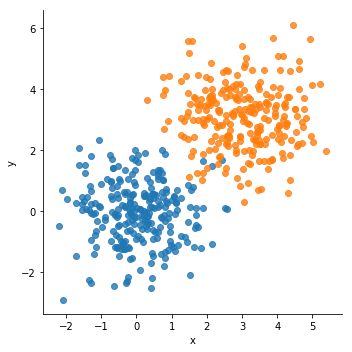

In [8]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd

data, labels = make_blobs(n_samples = 500,n_features = 2,centers=[[0,0],[3,3]])
df = pd.DataFrame(dict(x=data[:,0], y=data[:,1], label=labels))
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='label', legend=False)


<b>Exercise 4:</b>

Write a function 'find_best_split(x,y)' that gets two input vectors $x \in \mathbb{R}^d$ and $y \in \{0,1\}^d$. This function should return the threshold $t \in x$ with the best split. <b>Hint:</b> Use the function 'info_gain' from exercise 2.

In [9]:
def find_best_split(x,y):
    candidates = {t:info_gain(x,y,t) for t in x}
    v=list(candidates.values())
    k=list(candidates.keys())
    return k[v.index(max(v))]


Check if your solution is correct:

In [10]:
try:
    assert find_best_split(np.array([1,2,3,4,5,6,7,8,9,10]),np.array([1,1,1,1,1,0,0,0,0,0])) == 5
    assert find_best_split(np.array([1,2,2,4,5,6,7,8,9,10]),np.array([1,1,0,0,1,0,0,1,0,0])) == 8    
    print("Testing successful.")
except:
    print("Tests failed.")

Testing successful.


<b>Exercise 5:</b>

* Find the best splitting for the two dimensions of the data set created in exercise 3. Plot the boundaries in a figure. Your figure should look like this:
<img src="figures/split.png" width="600"/>
* Which split would you prefer, and why?

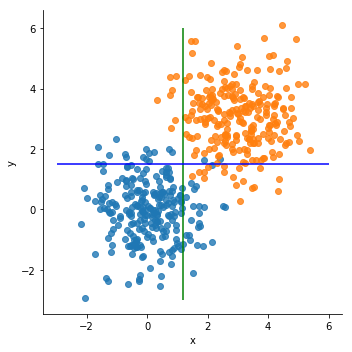

In [11]:
X = data
x_best = find_best_split(X[:,0],labels)
y_best = find_best_split(X[:,1],labels)
scatterplot = sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='label', legend=False)
plt.vlines(x_best,-3,6, color ='g')
plt.hlines(y_best,-3,6,color ='b')



In [12]:
# Generate new labels
df.loc[df['x'] > x_best, 'x_class'] = 1
df.loc[df['x'] <= x_best, 'x_class'] = 0
df.loc[df['y'] > y_best, 'y_class'] = 1
df.loc[df['y'] <= y_best, 'y_class'] = 0

In [13]:
def zero_one_loss(y_pred, y_true):
    wrong = 0
    for i, val in enumerate(y_pred):
        if val  != y_true[i]:
            wrong = wrong +1
            
    return wrong
display(zero_one_loss(df['x_class'],df['label']))
display(zero_one_loss(df['y_class'],df['label']))
# The split on x is better because it predicts the labels better by a total number of 6 predictions
# Ok, its a different number each run. I still stick to the split on x 

31

32

## Train a Decision Tree
Now we train a decision tree using the sklearn package:

<b>Exercise 6:</b>
* Calculate the predictions for all instances from the training set (use the function predict). Which instances are misclassified? Create a plot that shows which instances are correctly classified and which instances are misclassified. This figure should look like this:
<img src="figures/dec.png" width="600"/>
* Can you find learning parameter for the decision tree classifier (max_depth,min_samples_leaf,max_leaf_nodes,...) to get a classifier that classifies all instances correctly?

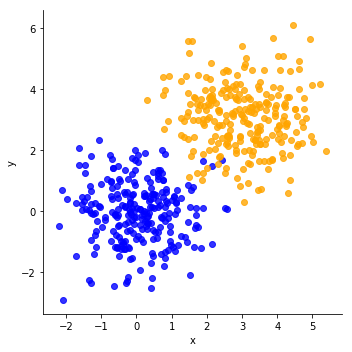

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf_tree.fit(df[['x','y']], df['label'])
prediction = clf_tree.predict(df[['x', 'y']])
df['prediction'] = prediction
# Create coloring vector
df['pred_colors'] = [x['label'] if x['label'] == x['prediction'] else 2 for _,x in df.iterrows()]
# Create color palette
color_dict = {0: 'blue',
            1: 'orange',
             2: 'red'}
sns.lmplot( x="x", y="y", data=df, fit_reg=False, hue='pred_colors', legend=False,palette=color_dict)


# max_depth = 7 creates a perfect prediction, at least for the run I tested it with. As make blobs generates random numbers,
# this figure probably is subject to change with each run.
